<a href="https://colab.research.google.com/github/ajaysaikiran2208/MLCONCEPTS/blob/main/Song_genre_prediction_using_Naive_Bayes_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Song genre prediction using Naive Bayes Algorithm

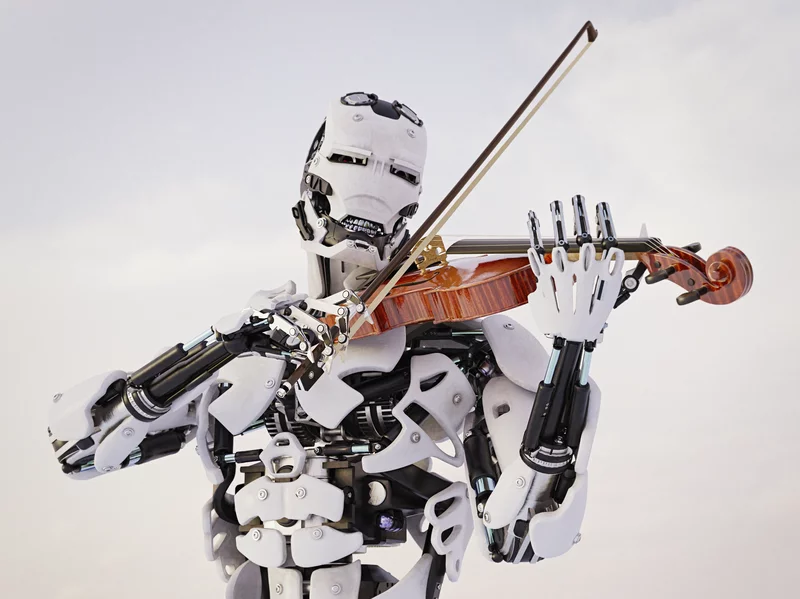

#Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#Loading Dataset

In [3]:
train_df=pd.read_csv("/content/kaggle_movie_train.csv")
train_df

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama
...,...,...,...
22574,28161,n in the world to decide what I'm going to do ...,drama
22575,28162,shards. BOJO LAZ! Laz pushes Deke back through...,drama
22576,28163,"OTTIE You've got a thing about Ernie's, haven'...",thriller
22577,28165,....with marked skill and dexterity . LANA wry...,action


#Columns Data

In [6]:
train_df.columns

Index(['id', 'text', 'genre'], dtype='object')

#Dataset shape

In [7]:
train_df.shape

(22579, 3)

#Plotting Count of various Genres

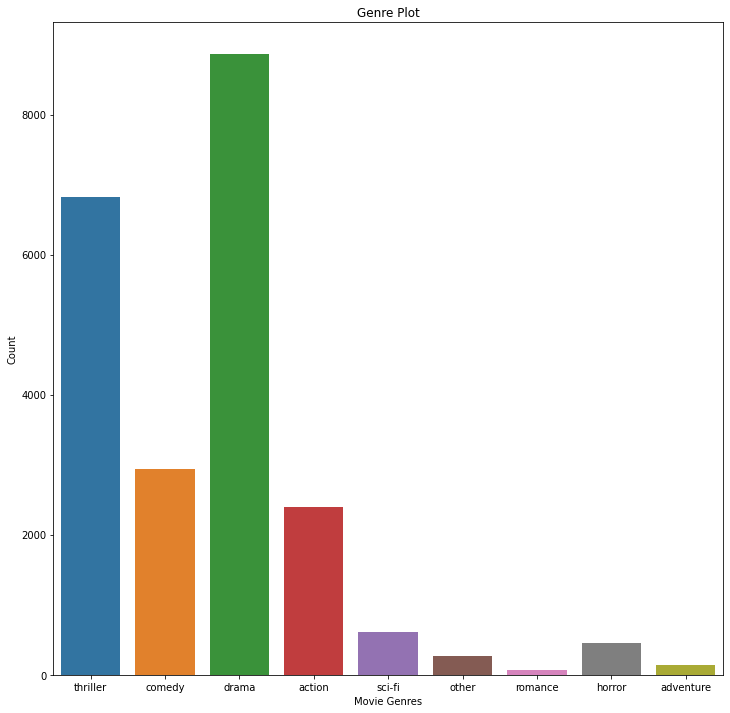

In [8]:
plt.figure(figsize=(12,12))
sns.countplot(x='genre', data=train_df)
plt.xlabel('Movie Genres')
plt.ylabel('Count')
plt.title('Genre Plot')
plt.show()

#Unique Data

In [9]:
movie_genre = list(train_df['genre'].unique())
movie_genre.sort()
movie_genre

['action',
 'adventure',
 'comedy',
 'drama',
 'horror',
 'other',
 'romance',
 'sci-fi',
 'thriller']

#One hot encoding

In [10]:
genre_mapper = {'other': 0, 'action': 1, 'adventure': 2, 'comedy':3, 
                'drama':4, 'horror':5, 'romance':6, 'sci-fi':7, 'thriller': 8}
train_df['genre'] = train_df['genre'].map(genre_mapper)
train_df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",8
1,2,"t, summa cum laude and all. And I'm about to l...",3
2,3,"up Come, I have a surprise.... She takes him ...",4
3,4,ded by the two detectives. INT. JEFF'S APARTME...,8
4,5,"nd dismounts, just as the other children reach...",4
5,6,breadth of the bluff. Gabe pulls out his ancie...,8
6,7,uilding. A MAN in pajamas runs out into the ra...,8
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,4
8,10,"Memphis goes back into the garage, Budgy cack...",8
9,11,e reels as the world spins. Sweat pours off hi...,1


#Checking for Null Values

In [11]:
train_df.isna().any()

id       False
text     False
genre    False
dtype: bool

#Droping ID Columns

In [12]:
train_df.drop('id', axis=1, inplace=True)

# Sentence Data Preprocessing 

In [14]:

corpus = []
ps = PorterStemmer()

for i in range(0, train_df.shape[0]):
    dialog = re.sub(pattern='[^a-zA-Z]', repl=' ', string=train_df['text'][i]) # Cleaning special character from the dialog/script
    dialog = dialog.lower() # Converting the entire dialog/script into lower case
    words = dialog.split() # Tokenizing the dialog/script by words
    dialog_words = [word for word in words if word not in set(stopwords.words('english'))] # Removing the stop words
    words = [ps.stem(word) for word in dialog_words] # Stemming the words
    dialog = ' '.join(words) # Joining the stemmed words
    corpus.append(dialog) # Creating a corpus

In [15]:
corpus[0:2]

['eadi dead mayb even wish int nd floor hallway three night orderli lead liza door orderli white guy open door step room three white guy mid look wild straight jacket jerri liza reach end rope shake head int decrepit hospit room night ball fetal realli head press cement tri sing jerri blue moon blue moon int nd floor hallway three night liza stand lean rail wall orderli sure go know bad orderli okay liza start hall orderli follow orderli got new patient last week want see liza wave hopeless stop chicken wire window end hall look light break jerri somewher orderli look gotta get back work',
 'summa cum laud launch brand new magazin call expos homag miss juli conroy xenia ohio juli grin juli know find excel editor chief ted yellow page juli let finger walk suddenli music chang peopl ted grin ted play song extend hand dare ask danc juli take hand better ted juli begin danc kiss b g charli jimmi feign tear charli sucker happi end hug jimmi hold start rise nelson hous cloud xenia ted v gues

In [16]:
len(corpus)

22579

#Looping through various Genres

In [18]:

drama_words = []
for i in list(train_df[train_df['genre']==4].index):
    drama_words.append(corpus[i])

action_words = []
for i in list(train_df[train_df['genre']==1].index):
    action_words.append(corpus[i])

comedy_words = []
for i in list(train_df[train_df['genre']==3].index):
    comedy_words.append(corpus[i])

drama = ''
action = ''
comedy = ''
for i in range(0, 3):
    drama += drama_words[i]
    action += action_words[i]
    comedy += comedy_words[i]

#Wordcloud

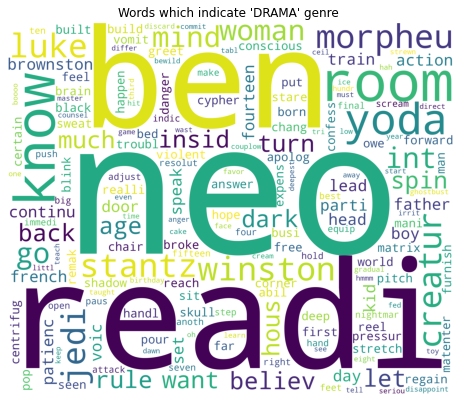

In [19]:

wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(action)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate 'DRAMA' genre ")
plt.show()

#Converting Words into Vectors

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=10000, ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()

#Prediction data

In [23]:
y = train_df['genre'].values

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (18063, 10000), X_test size: (4516, 10000)


#The multinomial Naive Bayes classifier is suitable for classification with discrete features.

In [25]:

from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

#Predicting the test data

In [26]:
nb_y_pred = nb_classifier.predict(X_test)

#Checking for model accuracy

In [27]:
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test, nb_y_pred)
print("---- Score ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))

---- Score ----
Accuracy score is: 89.57%


#Function for predicting the songs

In [36]:
def genre_prediction(sample_script):
    sample_script = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_script)
    sample_script = sample_script.lower()
    sample_script_words = sample_script.split()
    sample_script_words = [word for word in sample_script_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_script = [ps.stem(word) for word in sample_script_words]
    final_script = ' '.join(final_script)
    temp = cv.transform([final_script]).toarray()
    return nb_classifier.predict(temp)[0]

#Loading test data for prediction

In [29]:
test = pd.read_csv('/content/kaggle_movie_test.csv')
test.columns

Index(['id', 'text'], dtype='object')

In [30]:
test.shape

(5589, 2)

In [31]:
test.drop('id', axis=1, inplace=True)

#Generating random script for predicting the Genre

In [40]:
from random import randint
row = randint(0,test.shape[0]-1)
#sample_script = test.text[row]
sample_script=input("Emter the Lyrics:")
print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Emter the Lyrics:OTTIE You've got a thing about Ernie's, haven'...
Script: OTTIE You've got a thing about Ernie's, haven'...
Prediction: drama
